In [2]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

Loading DataSet


In [5]:
df_train = pd.read_csv('train-data.csv')
df_test = pd.read_csv('test-data.csv')

In [8]:
df_test.head()
df_train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,3,0,1,26.60,998,58.16,5,1.75
1,2015,41000,2,0,1,19.67,1582,126.20,5,12.50
2,2012,85000,2,1,2,15.00,2179,115.00,5,17.50
3,2014,110000,2,0,1,13.50,2477,175.56,7,15.00
4,2016,58950,2,0,1,25.80,1498,98.60,5,5.40


Checking for Null values

In [132]:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               4970 non-null   int64  
 1   Kilometers_Driven  4970 non-null   int64  
 2   Fuel_Type          4970 non-null   int64  
 3   Transmission       4970 non-null   int64  
 4   Owner_Type         4970 non-null   int64  
 5   Mileage            4970 non-null   float64
 6   Engine             4970 non-null   int64  
 7   Power              4970 non-null   float64
 8   Seats              4970 non-null   int64  
 9   Price              4970 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 388.4 KB


* Data has only float and integer values
* No variable column has null/missing values





In [135]:
df_train.describe()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,4970.000000,4.970000e+03,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000
mean,2013.366600,5.904794e+04,1.554930,0.286117,1.200201,18.289789,1620.619718,115.507487,5.279276,9.426809
std,3.239673,9.928827e+04,0.519591,0.451990,0.453026,4.148978,595.621535,55.629154,0.809031,11.173325
min,1998.000000,1.710000e+02,1.000000,0.000000,1.000000,6.400000,624.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,1.000000,0.000000,1.000000,15.155000,1198.000000,78.900000,5.000000,3.500000
50%,2014.000000,5.300000e+04,2.000000,0.000000,1.000000,18.160000,1493.000000,98.600000,5.000000,5.615000
75%,2016.000000,7.300000e+04,2.000000,1.000000,1.000000,21.100000,1982.500000,140.000000,5.000000,9.837500
max,2019.000000,6.500000e+06,3.000000,1.000000,4.000000,33.540000,5461.000000,560.000000,10.000000,160.000000


In [137]:
df_train.shape

(4970, 10)

Understanding Target variable

In [140]:
df_train.Price.unique()


array([  1.75,  12.5 ,  17.5 , ...,  12.81,   6.94, 120.  ])

<Axes: >

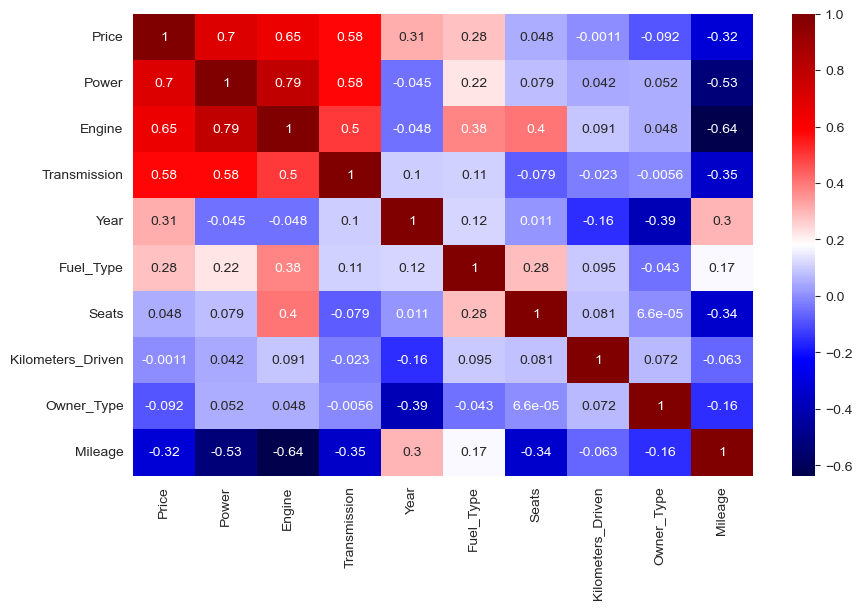

In [143]:
total_count = 10
cols = df_train.corr().nlargest(total_count, 'Price')['Price'].index
corr_matrix = df_train[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap = 'seismic')# '''viridis''' --- color 


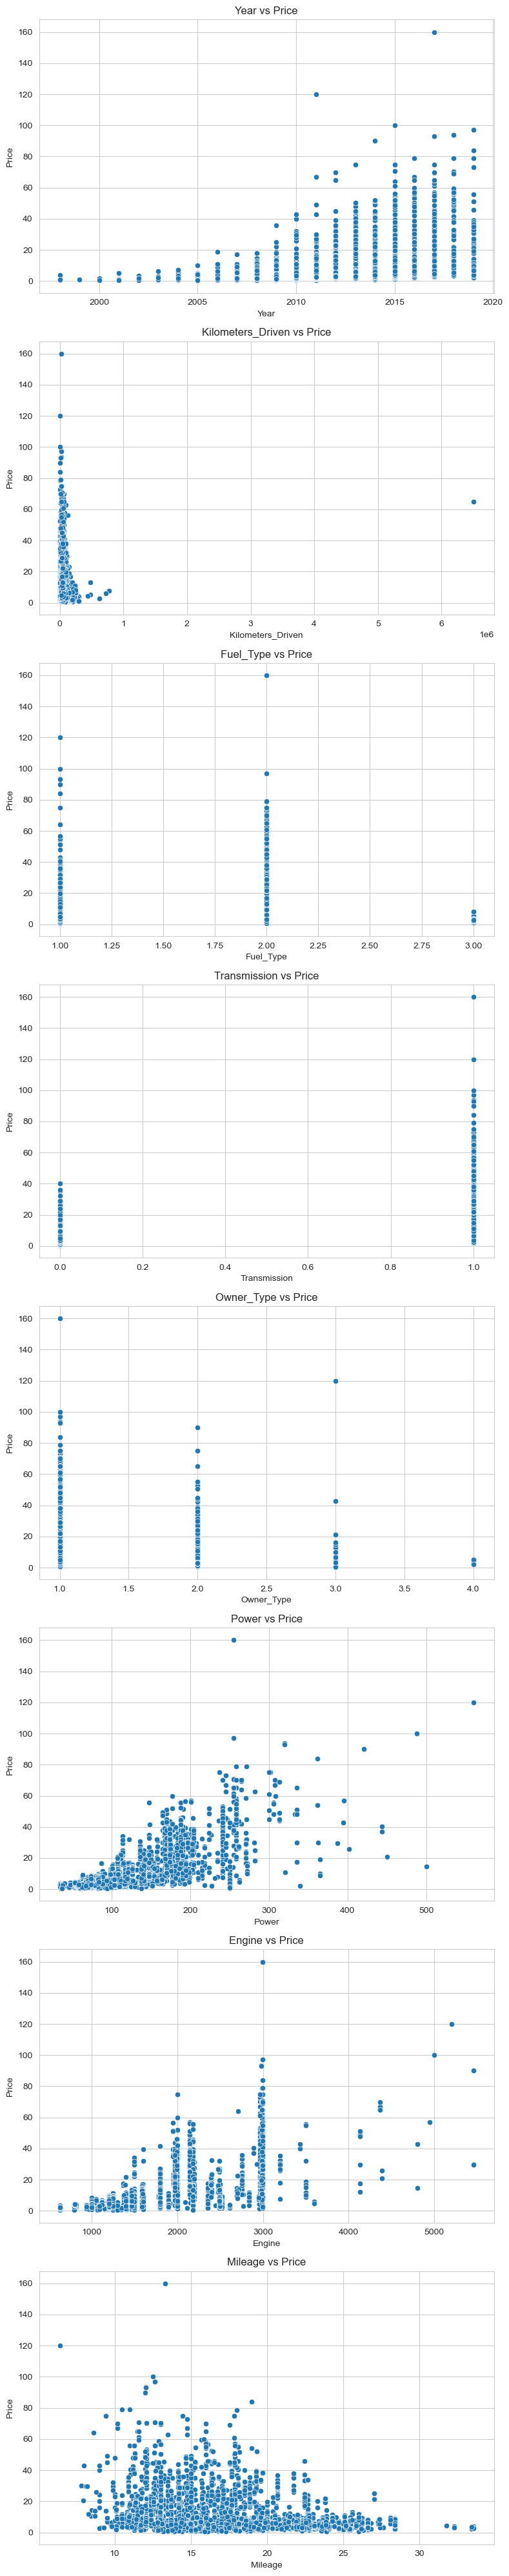

In [145]:
features = ['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Power', 'Engine', 'Mileage']

# Creating subplots
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 5 * len(features)))

# Ploting each feature against 'Price'
for i, feature in enumerate(features):
    sns.scatterplot(data=df_train, x=df_train[feature], y=df_train['Price'], ax=axes[i])
    axes[i].set_title(f'{feature} vs Price')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()


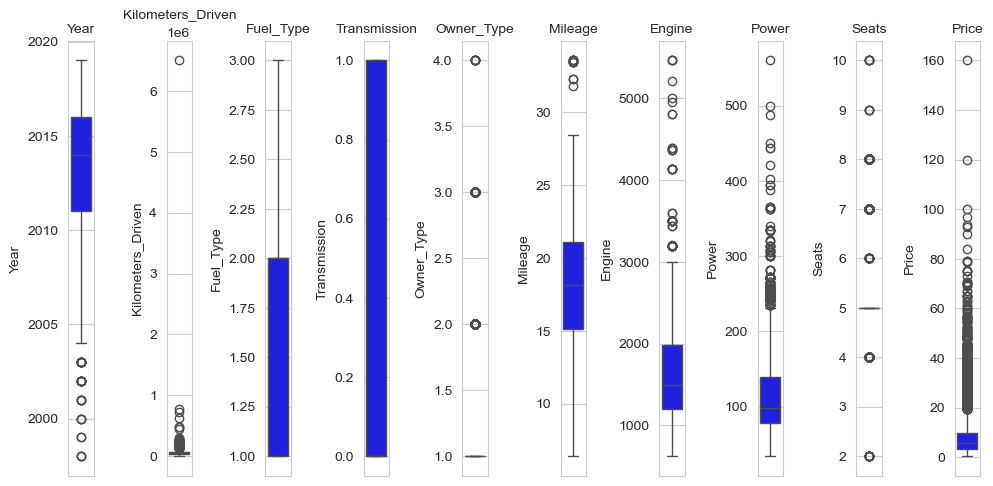

In [146]:
l = df_train.columns.values
number_of_columns=10
number_of_rows = len(l)-1//number_of_columns
plt.figure(figsize=(number_of_columns,5* number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_train[l[i]],color='blue',orient='v')
    plt.title(l[i], fontsize=10)
    plt.tight_layout()

By looking at the box plot we could see we have lots of outliers, if we build our model with the outliers it could affect the accuracy of the model.

## REMOVING OUTLIERS

In [149]:
outlier_indices = []

# Columns for which I want to remove outliers
columns_to_check = ['Year', 'Kilometers_Driven',  'Power', 'Engine', 'Mileage']

for column in columns_to_check:
    q1 = df_train[column].quantile(0.25)
    q3 = df_train[column].quantile(0.75)
    IQR = q3 - q1

    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR

    # Finding indices of outliers for the current column
    outliers = df_train[(df_train[column] < lower_limit) | (df_train[column] > upper_limit)].index
    outlier_indices.extend(outliers)

# Removing duplicate indices
outlier_indices = list(set(outlier_indices))

# Removing outliers from the DataFrame
df_no_outliers = df_train.drop(outlier_indices)



In [151]:
df_no_outliers.shape

(4473, 10)


specifying dependent and independent variable and alocating according for model building 

In [153]:
x = df_no_outliers[['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Power','Engine', 'Mileage']] # 'Seats'
y = df_no_outliers[['Price']]

# MODEL BUILDING 

In [156]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3, random_state =96)

Here we building our model on ***LINEAR REGRESSION*** 

In [158]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

***Here Linear Regression model performed quite good, the Accuracy is low but see the data spread below to understand, So non Linear Regression will perform well in this data***

In [160]:
y_pred = regressor.predict(x_test)

from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.7107420508496647

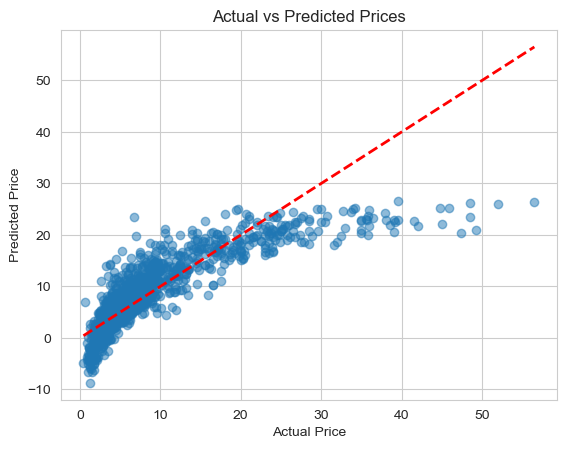

In [161]:
# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Draw a best fit line
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], linestyle='--', color='red', linewidth=2)

plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------

## PLOYNOMIAL REGRESSION

In [164]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2)
pr.fit(x_train,y_train)


PolynomialFeatures()

In [165]:
from sklearn import linear_model

x_train = pr.fit_transform(x_train)
x_test = pr.fit_transform(x_test)

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred

array([[ 6.68057252],
       [13.12417948],
       [ 4.45082099],
       ...,
       [34.77929523],
       [ 8.30342981],
       [ 4.726333  ]])

In [166]:
# R squre value
score_1 = r2_score(y_test,y_pred)
score_1

0.8517781109189436

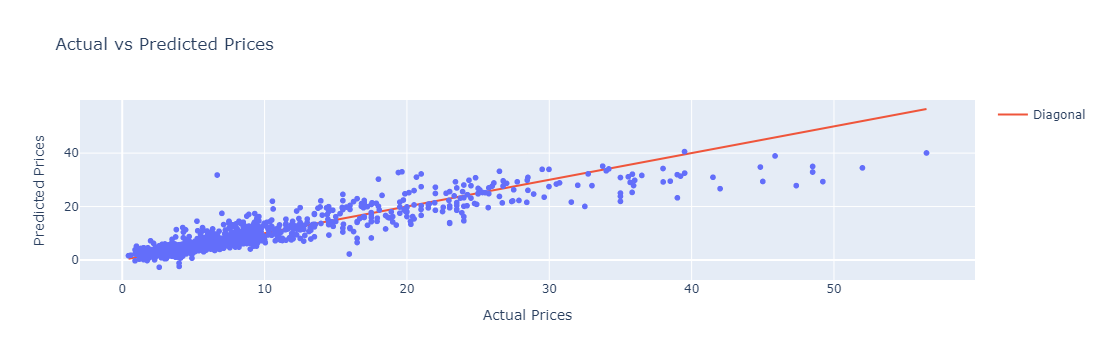

In [179]:
# Creating a DataFrame with actual and predicted prices
plot_data = pd.DataFrame({'Actual Prices': y_test.values.flatten(), 'Predicted Prices': y_pred.flatten()})

# Interactive scatter plot
fig = px.scatter(plot_data, x='Actual Prices', y='Predicted Prices', title='Actual vs Predicted Prices',
                 labels={'Actual Prices': 'Actual Prices', 'Predicted Prices': 'Predicted Prices'},
                 hover_data=[x_test[:, 1]])  

# Ploting Best fit line
fig.add_trace(go.Scatter(x=[plot_data['Actual Prices'].min(), plot_data['Actual Prices'].max()],
                         y=[plot_data['Actual Prices'].min(), plot_data['Actual Prices'].max()],
                         mode='lines', name='Diagonal'))


fig.show()



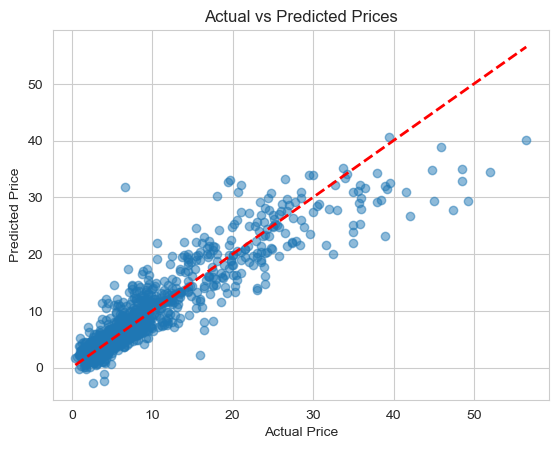

In [180]:
# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Draw a best fit line
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], linestyle='--', color='red', linewidth=2)

plt.show()

### HERE I AM GOING BUILD A MODEL ON RANDOM FOREST REGRESSOR, Let's see how it's perform's

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42) 
rf_regressor.fit(x_train, y_train.values.ravel())


In [ ]:
y_pred_rf = rf_regressor.predict(x_test)


***HERE YOU CAN SEE  RANDOM FOREST REGRESSOR PERFORMED WELL***

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'prediction:{y_pred_rf}')


----------------------------------------------------------------------------------------------------------------------------------------------